In [221]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import mpld3
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import filter_output_reader as freader
from importlib import reload

import scipy.stats as stats

%matplotlib inline

In [222]:
example_datafile = '../python/example_data.txt'
filter_config = '../cpp/connectivity.txt'
output_data = '../cpp/test_output.txt'

In [223]:
reload(freader)
dns_data = freader.read_dns_data(example_datafile)
nodes, conn = freader.read_filter_configuration(filter_config)
filter_result = freader.read_output_data(output_data)

Reading data from:   ../python/example_data.txt
Filter defined in:   connectivity.txt


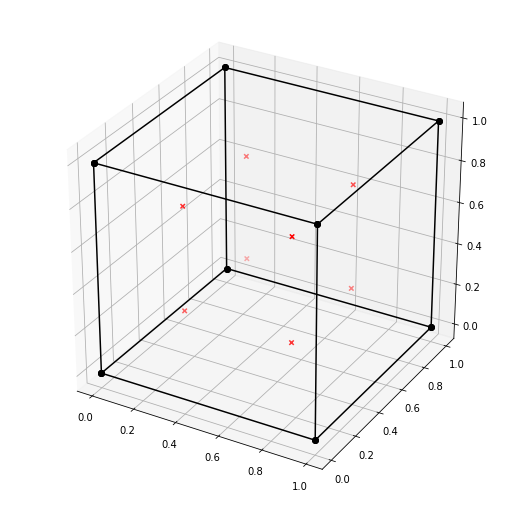

In [224]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
eid = 10
freader.plot_hex(10, nodes, conn, ax)
freader.plot_filter_cgs(eid, 0, filter_result, ax)

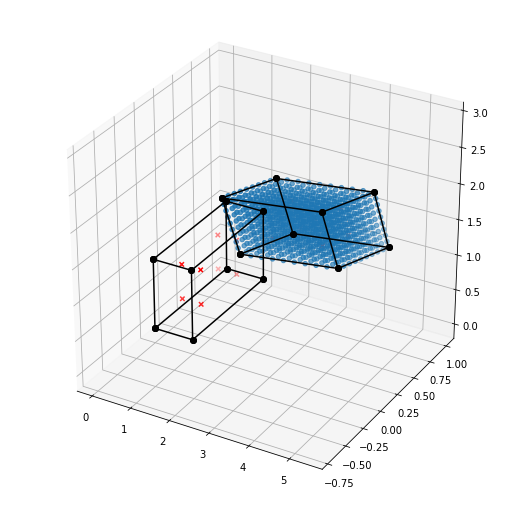

In [225]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

eid = 10
t = 0.0
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)

eid = 10
t = 1.0
ax.scatter(*zip(*dns_data[t]))
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)


In [226]:
tmp = filter_result[1][10].dof_values[0,3:]
print(filter_result[1][10].dof_values[1])


D = np.array([[tmp[0], tmp[5], tmp[4]],\
              [tmp[8], tmp[1], tmp[3]],\
              [tmp[7], tmp[6], tmp[2]]])

Csq = np.matmul(D.T, D)
Csq

[ 4.2  -0.3   1.95  1.   -0.4  -0.1  -0.2  -0.05  0.2  -0.2  -0.05  0.2 ]


array([[ 1.0425,  0.13  , -0.085 ],
       [ 0.13  ,  0.24  ,  0.09  ],
       [-0.085 ,  0.09  ,  0.0525]])

In [227]:
np.random.seed(123)
X = np.random.rand(9).reshape((3, 3))
print("X:\n",X)
A = X.dot(X)
print("A:\n",A)
Av = to_voigt(A)
#print(A[[0,0]])
#print('mat sqrt')

Xs = freader.matsqrt(A)
np.allclose(Xs.dot(Xs), A)

X:
 [[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]
A:
 [[0.86530995 0.56051022 0.38816255]
 [1.19559529 0.96514433 0.63296392]
 [1.53230958 1.10270543 0.74353916]]


True

In [228]:
A = X.T.dot(X)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=2)
np.allclose(Xs.T.dot(Xs), A)

[[1.75091571 1.26759759 0.86294068]
 [1.26759759 1.06850309 0.69867956]
 [0.86294068 0.69867956 0.46177615]] 3


True

In [229]:
A = X.dot(X.T)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=3)
np.allclose(Xs.dot(Xs.T), A)

[[0.61840663 0.68582444 0.98812887]
 [0.68582444 1.00060265 1.23690893]
 [0.98812887 1.23690893 1.66218568]] 3


True

In [230]:
freader.matsqrt(Csq, mode=2)

array([[ 1.01191649,  0.10050311, -0.09178315],
       [ 0.10050311,  0.44488363,  0.17882304],
       [-0.09178315,  0.17882304,  0.1099917 ]])

In [231]:
Csq

array([[ 1.0425,  0.13  , -0.085 ],
       [ 0.13  ,  0.24  ,  0.09  ],
       [-0.085 ,  0.09  ,  0.0525]])

In [232]:
D = np.array([[ 0.0897818,  -0.08773222, -0.0475752 ],
 [ 0.13518974, -0.05267145, -0.18058612],
 [ 0.06726339,  0.13142177, -0.0275545 ]]) + np.eye(3)

D.T.dot(D)

array([[ 1.210425  ,  0.0413    , -0.01085   ],
       [ 0.0413    ,  0.92240001, -0.0391    ],
       [-0.01085   , -0.0391    ,  0.980525  ]])

In [233]:
Q = np.array([[ 0.99255943, -0.11301034, -0.04532587],
 [ 0.1043222,   0.98125094, -0.16206009],
 [ 0.06279052,  0.15612578,  0.98573936]])
np.matmul(Q.T, Q)

array([[ 9.99999993e-01, -2.93003260e-09,  2.18641510e-09],
       [-2.93003260e-09,  1.00000000e+00,  2.78721198e-09],
       [ 2.18641510e-09,  2.78721198e-09,  9.99999993e-01]])

In [234]:
C = np.array([[ 1.1,    0.02,  -0.005],
 [ 0.02,   0.96,  -0.02 ],
 [-0.005, -0.02,   0.99 ]])

E = C.T.dot(C)

In [235]:
Es = D.T.dot(D)

np.allclose(E, Es)

True

In [236]:
np.linalg.eig(E)

(array([1.21735825, 0.89936105, 0.9966307 ]),
 array([[ 0.98663521,  0.10501586,  0.12458989],
        [ 0.14736543, -0.90134534, -0.40725913],
        [-0.06952985, -0.42017644,  0.90477476]]))

In [237]:
np.linalg.eig(Es)

(array([1.21735825, 0.89936105, 0.9966307 ]),
 array([[ 0.98663521,  0.10501585,  0.12458988],
        [ 0.14736543, -0.90134533, -0.40725917],
        [-0.06952983, -0.42017648,  0.90477474]]))

In [238]:
filter_result[1][10]

MicromorphicFilterData:
 nodes:
   +3.2000 -0.5000 +2.0000
   +5.2000 -0.3000 +1.9500
   +5.4000 +0.3000 +1.7500
   +3.4000 +0.1000 +1.8000
   +3.1500 -0.7000 +2.9000
   +5.1500 -0.5000 +2.8500
   +5.3500 +0.1000 +2.6500
   +3.3500 -0.1000 +2.7000
 dof values:
   +3.2000 -0.5000 +2.0000 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +4.2000 -0.3000 +1.9500 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +4.4000 -0.7000 +1.7500 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +3.4000 -0.9000 +1.8000 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +3.1500 -0.7000 +1.9000 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +4.1500 -0.5000 +1.8500 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +4.3500 -0.9000 +1.6500 +1.0000 -0.4000 -0.1000 -0.2000 -0.0500 +0.2000 -0.2000 -0.0500 +0.2000
   +3.3500 -1.1000 +1.7000 +1.0000 -0.4000 -0.